# Beta
Beta value measures the stock volatility in relation to the general market often the sp500 
S&P 500 has a beta of 1
high beta stocks are supposed to be riskier but provide high return and vice versa  

# formula 
Beta/covariance

a beta above1 : stock is more volatile than the market, but expects higher return 
beta below 1: stock with lower volatility, and expects less return 


In [1]:
import numpy as np
import pandas as pd 
import pandas_datareader as pdr 
import datetime as dt
from sklearn.linear_model import LinearRegression 

In [4]:
tickers = ["AAPL","MSFT","IBM","^GSPC" ]
start = dt.datetime(2016,12,1)
end =dt.datetime(2022,1,1)

data = pdr.get_data_yahoo(tickers, start, end, interval= "m")

In [5]:
data = data["Adj Close"]

In [6]:
data.head()

Symbols,AAPL,MSFT,IBM,^GSPC
Date,,,,
2016-12-01,27.220137,57.657200,123.425346,2238.830078
2017-01-01,28.519800,59.986126,129.767990,2278.870117
2017-02-01,32.195534,59.364460,133.708969,2363.639893
2017-03-01,33.909504,61.479309,130.556793,2362.719971
2017-04-01,33.907139,63.906368,120.173119,2384.199951


In [7]:
log_returns = np.log(data/data.shift())

In [8]:
log_returns

Symbols,AAPL,MSFT,IBM,^GSPC
Date,,,,
2016-12-01,NaN,NaN,NaN,NaN
2017-01-01,0.046642,0.039598,0.050112,0.017726
2017-02-01,0.121229,-0.010418,0.029917,0.036523
2017-03-01,0.051868,0.035005,-0.023857,-0.000389
2017-04-01,-0.000070,0.038718,-0.082875,0.009050
...,...,...,...,...
2021-09-01,-0.068965,-0.066494,0.001879,-0.048738
2021-10-01,0.057001,0.162366,-0.104857,0.066858
2021-11-01,0.098461,-0.003111,-0.021112,-0.008369


In [10]:
cov = log_returns.cov()

In [11]:
var = log_returns["^GSPC"].var()

In [12]:
var

0.0020261419171389073

In [13]:
cov.loc["AAPL","^GSPC"]/var

1.160881524443471

In [14]:
cov.loc["^GSPC"]/var

Symbols
AAPL     1.160882
MSFT     0.862249
IBM      1.078505
^GSPC    1.000000
Name: ^GSPC, dtype: float64

In [16]:
X = log_returns["^GSPC"].iloc[1:].to_numpy().reshape(-1,1)
Y = log_returns["AAPL"].iloc[1:].to_numpy().reshape(-1,1)

lin_regr = LinearRegression()
lin_regr.fit(X,Y)

lin_regr.coef_[0,0]

1.1608815244434711

In [19]:
import matplotlib.pyplot as plt
%matplotlib notebook


<IPython.core.display.Javascript object>


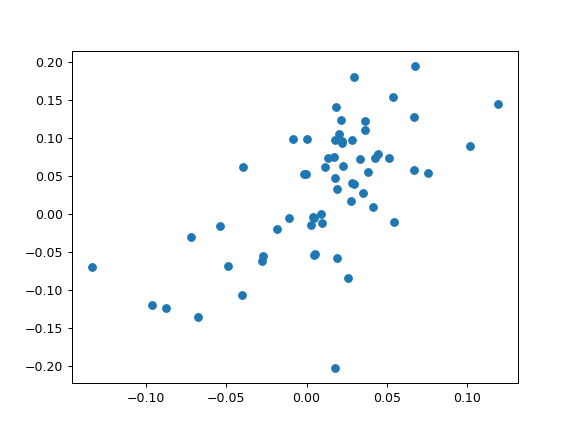

In [20]:
fig, ax = plt.subplots()
ax.scatter(X,Y)